# Covariance implementation with numpy

What is the difference between covariance and correlation ?<br>

**Covariance** is a measure of the degree to which returns on two assets move in tandem.<br>
**Correlation** is a coefficient that determines the degree to which two variables movements are associated.<br>
Also the correlation coefficient measures linear relationship between two arrays/vector/asset.<br>
<br>
This notebook is not a tutorial, is just open source code for people that are curious on how covariance and correlation are coded (connected)

# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd
import numbers
import seaborn as sns
import matplotlib.pylab as plt

In [ ]:
df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df.head()

In [ ]:
df.columns

In [ ]:
df_numbers = df.select_dtypes([np.number])
df_numbers.head()

In [ ]:
df_imp = df_numbers[['LotFrontage', 'LotArea', 'YearBuilt', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'PoolArea', 'SalePrice']]

# Mathemtatics

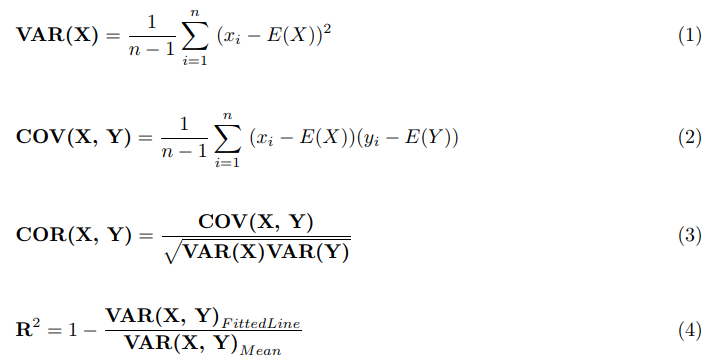

# Numpy open source code

In [ ]:
def _covhelper(x, y=None, rowvar=True, allow_masked=True):
    """
    Private function for the computation of covariance and correlation
    coefficients.
    """
    x = np.ma.array(x, ndmin=2, copy=True, dtype=float)
    xmask = np.ma.getmaskarray(x)
    # Quick exit if we can't process masked data
    if not allow_masked and xmask.any():
        raise ValueError("Cannot process masked data.")
    #
    if x.shape[0] == 1:
        rowvar = True
    # Make sure that rowvar is either 0 or 1
    rowvar = int(bool(rowvar))
    axis = 1 - rowvar
    if rowvar:
        tup = (slice(None), None)
    else:
        tup = (None, slice(None))
    #
    if y is None:
        xnotmask = np.logical_not(xmask).astype(int)
    else:
        y = array(y, copy=False, ndmin=2, dtype=float)
        ymask = ma.getmaskarray(y)
        if not allow_masked and ymask.any():
            raise ValueError("Cannot process masked data.")
        if xmask.any() or ymask.any():
            if y.shape == x.shape:
                # Define some common mask
                common_mask = np.logical_or(xmask, ymask)
                if common_mask is not nomask:
                    xmask = x._mask = y._mask = ymask = common_mask
                    x._sharedmask = False
                    y._sharedmask = False
        x = ma.concatenate((x, y), axis)
        xnotmask = np.logical_not(np.concatenate((xmask, ymask), axis)).astype(int)
    x -= x.mean(axis=rowvar)[tup]
    return (x, xnotmask, rowvar)

In [ ]:
def cov(x, y=None, rowvar=True, bias=False, allow_masked=True, ddof=None):
    """
    Estimate the covariance matrix.
    Except for the handling of missing data this function does the same as
    `numpy.cov`. For more details and examples, see `numpy.cov`.
    By default, masked values are recognized as such. If `x` and `y` have the
    same shape, a common mask is allocated: if ``x[i,j]`` is masked, then
    ``y[i,j]`` will also be masked.
    Setting `allow_masked` to False will raise an exception if values are
    missing in either of the input arrays.
    Parameters
    ----------
    x : array_like
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of `x` represents a variable, and each column a single
        observation of all those variables. Also see `rowvar` below.
    y : array_like, optional
        An additional set of variables and observations. `y` has the same
        form as `x`.
    rowvar : bool, optional
        If `rowvar` is True (default), then each row represents a
        variable, with observations in the columns. Otherwise, the relationship
        is transposed: each column represents a variable, while the rows
        contain observations.
    bias : bool, optional
        Default normalization (False) is by ``(N-1)``, where ``N`` is the
        number of observations given (unbiased estimate). If `bias` is True,
        then normalization is by ``N``. This keyword can be overridden by
        the keyword ``ddof`` in numpy versions >= 1.5.
    allow_masked : bool, optional
        If True, masked values are propagated pair-wise: if a value is masked
        in `x`, the corresponding value is masked in `y`.
        If False, raises a `ValueError` exception when some values are missing.
    ddof : {None, int}, optional
        If not ``None`` normalization is by ``(N - ddof)``, where ``N`` is
        the number of observations; this overrides the value implied by
        ``bias``. The default value is ``None``.
        .. versionadded:: 1.5
    Raises
    ------
    ValueError
        Raised if some values are missing and `allow_masked` is False.
    See Also
    --------
    numpy.cov
    """
    # Check inputs
    if ddof is not None and ddof != int(ddof):
        raise ValueError("ddof must be an integer")
    # Set up ddof
    if ddof is None:
        if bias:
            ddof = 0
        else:
            ddof = 1

    (x, xnotmask, rowvar) = _covhelper(x, y, rowvar, allow_masked)
    if not rowvar:
        fact = np.dot(xnotmask.T, xnotmask) * 1. - ddof
        result = (np.ma.dot(x.T, x.conj(), strict=False) / fact).squeeze()
    else:
        fact = np.dot(xnotmask, xnotmask.T) * 1. - ddof
        result = (np.ma.dot(x, x.T.conj(), strict=False) / fact).squeeze()
    return result

# Correlation to Covariance

In [ ]:
def correlation_from_covariance(covariance):
    v = np.sqrt(np.diag(covariance))
    outer_v = np.outer(v, v)
    correlation = covariance / outer_v
    correlation[covariance == 0] = 0
    return correlation

In [ ]:
masked_A = np.ma.MaskedArray(df_imp.values, np.isnan(df_imp))
cov_np = cov(masked_A, rowvar=0).data
cor_np = correlation_from_covariance(cov_np)

In [ ]:
pd.DataFrame(cor_np,columns=list(df_imp.columns))

# Numpy correlation vs Pandas correlation

In [ ]:
def plot_heatmap(array, columns):

    fig, ax = plt.subplots(figsize=(10,10))

    sns.heatmap(pd.DataFrame(array,columns=columns), 
            annot=True,
            cbar = True,
            fmt="0.2f",
            cmap="YlGnBu", 
            ax=ax)

### Pandas Correlation heatmap

In [ ]:
plot_heatmap(df_imp.corr().values, list(df_imp.columns))

### Numpy Correlation heatmap

In [ ]:
plot_heatmap(cor_np, list(df_imp.columns))

# Conclusion

The code is open source and all the credits go to Numpy developers.<br>
https://github.com/numpy